## Python Concurrency

1 Core - Single thread and single process


2-8 Cores- Multiple threads and multiple processes


9+ Cores- use Distributed processing

### History

- CPUs are not becoming faster(in terms of frequency/cycles) since 20 years
- We have reached the threshold so,we are increasing number of cores.
- We are going from 1 core to dual core to 100 core Computers/CPUs

### Objective of Concurrent Programming

- Make use of as many Cores as possible to speed up

### Computer Architecture Basics 101

#### Hardware

- CPU - do the processing
- RAM - Program data is stored here
- I/O - File access,Network requests,Keyboard,ROMs,etc

#### Software

- OS
    - layer between our code and the computer's hardware
    - Code written by someone to access the above hardwares
    - Every code we write goes to OS layer and this OS layer goes to each resource and do the work
    - So,OS is like middle layer between our code and the hardware

### Relating Code to Computer

In [11]:
x=10  # This will be stored in memory
x=x*10 # This will be done by CPU
with open('demo.txt','w') as file:  # I/O (write to file)
    file.write(f"value entered is {x}")
    
print(x) # I/O (print on screen)

100


When you have to run some code,OS will do the heavylifting:
    - OS will wraps the code snippet in special structure called <b>Process</b>
    - Its gonna load our code in memory,allocate the memory to it
    - Give local variables and global variables in memory
    - Reference to network/files if required

#### Processes

- One CPU(core) => 1 task/process at one time
    - Even then if you run/start multiple tasks,CPU will keep switching
    - It will first run One,and then shift to second process but the switching is so speedy that it seems as if it is handling multiple processes
    - But,it reality,it is just stopping one and shifting to other
    - means CPU is shared 
    - It is called <b>Concurrency</b>
    - Concurrency- CPU keeps on switching

In <b>Parallelism</b>,one CPU takes care of one task,
Another CPU takes care of another
OS decides which task to run at given time.It keeps on switching back and forth

#### If process is I/O heavy,we should give that process a CPU because it will take a lot of time,it gets more priority

### Making our Code run Parallely

Lets say we have to go to 3 websites and get results
Since python is sequencial and single threaded by default.

So,if we just do
d1=get_website1() #2s
d2=get_website2() #2s
d3=get_website3() #2s

Python will wait for 2s until we get the d1 .

Since all of them are unrealted,we should fetch all of them separately(using separate threads)
and then combine all of threads once every result is fetched
so then total time taken will be less


So,In Multithreading:
1.<b>create</b> thread(s)

2.These threads needs some callables(some action to perform once results are fetched)
these actions are called <b>targets</b>.so pass targets

    - The beauty in threads is once you have assigned work to one thread,you can continue working on other things ,it will keep runing in the backend.You have create small small thread (in the process) to do the external job.You still have the full control of main thread on which this code(or process is running on)

3.Start the <b>thread</b>

### CODE

In [35]:
from threading import Thread
import time
import random

In [51]:
def simple(note):
    print(f'hello {random.randint(0,99)}')
    time.sleep(2)
    print('sahil')

In [52]:
# creating one thread
# t1=Thread(target=simple)

In [53]:
# starting one thread
# t1.start()

In [56]:
# create 5 threads
threads=[Thread(target=simple,args=('note', )) for i in range(5)]
#Note: for args,it takes only in tupple,so even if one arg,pass in tupple as secnd as empty

In [40]:
# start every thread
[x.start() for x in threads]

hello 97
hello 20
hello 79
hello 82hello 68


[None, None, None, None, None]


sahil
sahilsahil

sahilsahil



In [50]:
# join every thread
[x.join() for x in threads]

[None, None, None, None, None]

### REAL LIFE EXAMPLE OF MULTITHREADING:

#### Qn: You have to fetch prices of BTC from 3 exchanges

Traditional/Default way:SEQUENTIAL

    2s            2s           2s
--------------------------------------->         # Sequential =>~6s
    website1    website2    website3

In [49]:
exchanges=['wazirx','coindcx','coinbase']

for exchange in exchanges:
    break   # It is written because the below code is dummy
    response=requests.get(f"www.api.com/{exchange}/bitcoin")
    print(f"price on {exchange} is {response.json()['openvalue']}")
    
# It will go to one exchange->wait->fetch->then go to another exchange

Parallel way using Multithreading:

In [ ]:
   |           |        | 
   |           |        |
   | w1        |w2      | w3
# parallel=>~ 2s

In [ ]:
def price(exchange,btc):
    response=requests.get(f"www.api.com/{exchange}/{btc}")
    print(f"price on {exchange} is {response.json()['openvalue']}")
    
# Create 1 thread for 1 exchange
threads=[Thread(target=price,args=('btc',)) for exchange in exchanges]

# start the threads 
[t.start() for t in threads()]

# join them them every one is back with results
[t.join() for t in threads()]

### Multiprocessing

- Use if CPU Bound code
    - CPU bound means involves processing
    
- Multiprocessing,takes the code,starts a new process
- In Multithreading,multiple threads were created within 1 single process


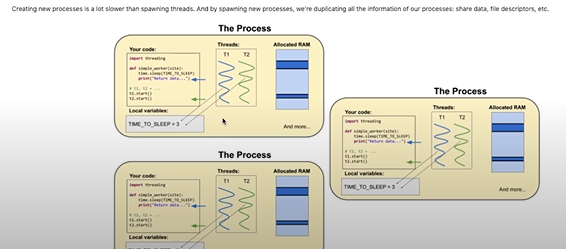

In [57]:
import multiprocessing as mp
from multiprocessing import Process

In [ ]:
# if you want to pass the whole array
with mp.Pool(processes=4) as pool:
    results=pool.map(even,numbers) #numbers is array
    print(results)

In [ ]:
# if you want to pass the elements of array
with mp.Pool(processes=4) as pool:
    results=pool.apply_async(even,n) # n is element of array
    print(results)

So, if you need to run a function in a separate process, but want the current process to block until that function returns, use Pool.apply. Like Pool.apply, Pool.map blocks until the complete result is returned.

If you want the Pool of worker processes to perform many function calls asynchronously, use Pool.apply_async. The order of the results is not guaranteed to be the same as the order of the calls to Pool.apply_async

.map()->on collection/iterable

.apply()->on one arg

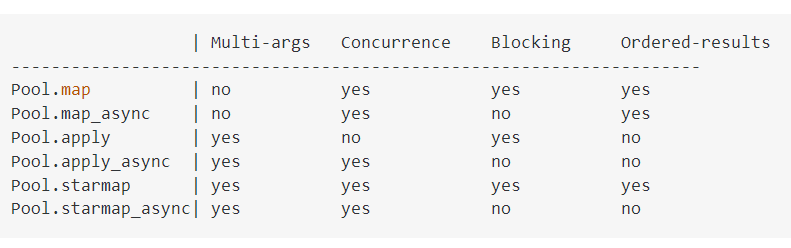